In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm

In [15]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import time

In [3]:
def E( parameters,z):   #Flat lambdaCDM universe
    omega=parameters[0]
    omega_lambda=parameters[1]
    omega_R = 1-omega-omega_lambda
    return ((omega*((1+z)**3)) + (omega_R*((1+z)**2))+ omega_lambda)**(1/2)

In [4]:
def erf_new(x):
    return ((4/np.pi)**(1/2))*(erf(x)-erf(0))

In [5]:
def alpha(parameters,sigma_Ho,sigma,z):
    #sigma,z,H_obs are vectors

    n = len(sigma)
    alpha0=1/(sigma_Ho)**2
    for i in range(n):
        alpha0 = alpha0 + (E(parameters,z[i])/sigma[i])**2
        
    return alpha0
        

In [6]:
def beta(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    n = len(sigma)
    beta0=Ho/((sigma_Ho)**2)
    for i in range(n):
        beta0 = beta0 + (E(parameters,z[i])*H_obs[i]/((sigma[i])**2))
        
    return beta0
    

In [7]:
def gamma(Ho,sigma_Ho,H_obs,sigma):
    n = len(sigma)
    gamma0=(Ho/(sigma_Ho))**2
    for i in range(n):
        gamma0 = gamma0 + (H_obs[i]/sigma[i])**2
        
    return gamma0 

In [8]:
def Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    alpha0= alpha(parameters,sigma_Ho,sigma,z)
    beta0= beta(parameters,Ho,sigma_Ho,H_obs,sigma,z)
    gamma0= gamma(Ho,sigma_Ho,H_obs,sigma)
    LH1= (1/(4*alpha0*((sigma_Ho)**2)))**(1/2)
    LH2= np.exp(-gamma0/2+(((beta0)**2)/(2*alpha0)))
    LH3 = 1+ erf_new(beta0/((2*alpha0)**(1/2)))
    return (LH1*LH2*LH3)


In [9]:
def Chi_sq(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return (-2*np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)))

In [10]:
Data = pd.read_csv("Hdata - Table 1.csv")
print(Data)

    Unnamed: 0      z      H  Sigma
0          NaN  0.070   69.0   19.6
1          NaN  0.100   69.0   12.0
2          NaN  0.120   68.6   26.2
3          NaN  0.170   83.0    8.0
4          NaN  0.179   75.0    4.0
5          NaN  0.199   75.0    5.0
6          NaN  0.200   72.9   29.6
7          NaN  0.270   77.0   14.0
8          NaN  0.280   88.8   36.6
9          NaN  0.350   76.3    5.6
10         NaN  0.352   83.0   14.0
11         NaN  0.400   95.0   17.0
12         NaN  0.440   82.6    7.8
13         NaN  0.480   97.0   62.0
14         NaN  0.593  104.0   13.0
15         NaN  0.600   87.9    6.1
16         NaN  0.680   92.0    8.0
17         NaN  0.730   97.3    7.0
18         NaN  0.781  105.0   12.0
19         NaN  0.875  125.0   17.0
20         NaN  0.880   90.0   40.0
21         NaN  0.900  117.0   23.0
22         NaN  1.037  154.0   20.0
23         NaN  1.300  168.0   17.0
24         NaN  1.430  177.0   18.0
25         NaN  1.530  140.0   14.0
26         NaN  1.750  202.0

In [11]:
Data = Data.to_numpy()

In [12]:
z = Data[:,1]
H_obs = Data[:,2]
sigma = Data[:,3]
print(z)

[0.07  0.1   0.12  0.17  0.179 0.199 0.2   0.27  0.28  0.35  0.352 0.4
 0.44  0.48  0.593 0.6   0.68  0.73  0.781 0.875 0.88  0.9   1.037 1.3
 1.43  1.53  1.75  2.3  ]


In [13]:
print(np.exp(-3.085))

0.04573003390021825


In [29]:
Ho= 68
sigma_Ho=2.8

In [17]:
start = time.time()
print(Chi_sq([0.30,0.91],68,2.8,H_obs,sigma,z))
end = time.time()
print(end-start)

22.234156034232086
0.006999492645263672


In [44]:
best_fit_params = minimize (Chi_sq,x0=[0,0],args=(73.8,2.4,H_obs,sigma,z),bounds=[(0,2),(0,2)])
print(best_fit_params)

      fun: 19.100213083961627
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0003336, -0.0001954])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([0.32022274, 0.90850051])


In [45]:
best_fit_params = minimize (Chi_sq,x0=[0,0],args=(68,2.8,H_obs,sigma,z),bounds=[(0,2),(-1,1)])
print(best_fit_params)

      fun: 18.06910992024372
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00024727, -0.00054463])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([0.29227965, 0.72380354])


In [53]:
xlist = np.linspace(0, 0.60, 1000)
ylist = np.linspace(0, 1.4, 1000)
parameters = np.meshgrid(xlist, ylist)
X=parameters[0]
Y=parameters[1]

In [54]:
Z = Chi_sq(parameters,68,2.8,H_obs,sigma,z)
Z2 =  Chi_sq(parameters,73.8,2.4,H_obs,sigma,z)

<ipython-input-33-1f0ce3c1f43a>:5: RuntimeWarning: invalid value encountered in sqrt
  return ((omega*((1+z)**3)) + (omega_R*((1+z)**2))+ omega_lambda)**(1/2)


In [55]:
print(Z)

[[33.37408887 33.33210405 33.29060986 ... 96.44667258 96.54717401
  96.64768605]
 [33.36286039 33.32050125 33.27863429 ... 96.36186198 96.46239065
  96.56292997]
 [33.35196087 33.309226   33.26698484 ... 96.27704146 96.37759736
  96.47816396]
 ...
 [        nan         nan         nan ... 44.37108247 44.40288731
  44.43510864]
 [        nan         nan         nan ... 44.46290572 44.4942494
  44.52601145]
 [        nan         nan         nan ... 44.55561446 44.5864944
  44.61779461]]


<ipython-input-105-10703363b397>:9: RuntimeWarning: divide by zero encountered in true_divide
  omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
<ipython-input-105-10703363b397>:9: RuntimeWarning: invalid value encountered in arccosh
  omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
<ipython-input-105-10703363b397>:9: RuntimeWarning: invalid value encountered in multiply
  omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
<ipython-input-105-10703363b397>:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,0.23,"Acceleration",Rotation="10",weight="bold")
<ipython-input-105-10703363b397>:43: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,0.12,"Deceleration",Rotation="10",weight="bold")
<ipython-in

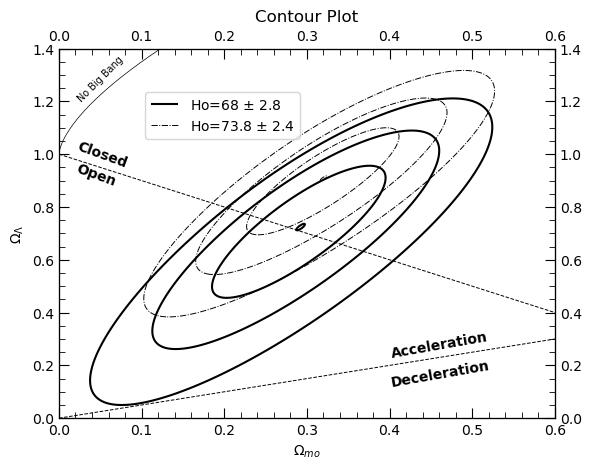

In [105]:
fig, ax1 = plt.subplots()

#drawing contour plot

cb = ax1.contour(X, Y, Z2,levels=[19.105,21.4,25.27,30.9],colors="black",linewidths=0.7,linestyles="dashdot")
cb2 = ax1.contour(X, Y, Z,levels=[18.075,20.37,24.24,29.87],colors="black")
flat_lambda_CDM = ax1.plot(xlist,1-xlist,c="black",ls="--",lw=0.7)
acceleration_line=ax1.plot(xlist,xlist/2,c="black",ls="--",lw=0.7)
omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
nobigbang= ax1.plot(xlist,omega_lambda_nobigbang,c="black",lw=0.5)
#Adding a colorbar to the plot
#fig.colorbar(cb) 

ax2 = ax1.twinx()
ax2.tick_params(direction='in')
ax2.set_ylim(0,1.4)
ax3= ax1.twiny()
ax3.tick_params(direction='in')
ax3.set_xlim(0,0.6)
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
        
ax1.set_title('Contour Plot')
ax1.set_xlabel('$\Omega_{mo}$')
ax1.set_ylabel('$\Omega_{\Lambda}$')
ax1.set_ylim(0,1.4)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.text(0.4,0.23,"Acceleration",Rotation="10",weight="bold")
ax1.text(0.4,0.12,"Deceleration",Rotation="10",weight="bold")
ax1.text(0.018,0.88,"Open",Rotation="-20",weight="bold")
ax1.text(0.02,0.95,"Closed",Rotation="-20",weight="bold")
ax1.text(0.02,1.2,"No Big Bang",Rotation="45",size="x-small")
#ax2.plot("--")

lines = [ cb2.collections[0],cb.collections[0]]
labels = ['Ho=68 $\pm$ 2.8','Ho=73.8 $\pm$ 2.4']
#ax.legend(["1","2"],loc=4,bbox_to_anchor=(1.1, 0.0))
#Ho=68 $\pm$ 2.8
#Ho=73.8 $\pm$ 2.4
plt.legend(lines, labels,bbox_to_anchor=(0.5, 0.9))
plt.show()